In [3]:
# Importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms


from classes.utils import *
from classes.CNN import VGG11
from classes.MLP import MLP

## MLP Classification Example

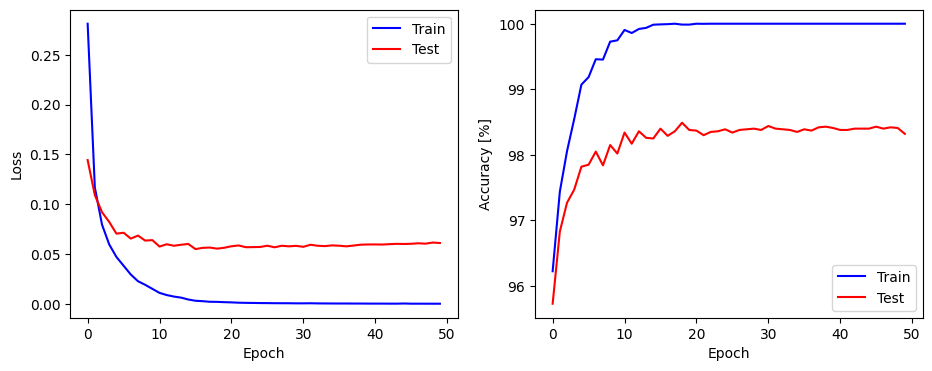

In [ ]:
# Main function to run the experiments
def main():

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Define the transformation on data
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert PIL Image to tensor
        transforms.Normalize((0.5), (0.5)) # Normalize data with mean=0.5 and std=0.5
    ])
    data_loader = load_data(transform, train_val_ratio=1, batch_size=200)

    # Hyper-parameters
    num_epochs = 50
    learning_rate = 0.01
    momentum = 0.9

    # MLP architecture
    model = MLP(input_dim=784, hidden_dim=512, output_dim=10).to(device)

    # Loss function
    criterion = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # Train Model
    train_losses, train_accuracies, val_losses, val_accuracies = train(
        num_epochs=num_epochs, 
        data_loader=data_loader, 
        model=model, 
        optimizer=optimizer, 
        criterion=criterion, 
        device=device, 
        verbose=True
    )

    # Plot results
    all_losses = [train_losses, val_losses]
    all_accuracies = [train_accuracies, val_accuracies]
    all_labels = ["Train", "Validation"]
    plot_all_results(all_losses, all_accuracies, all_labels)

    # Evaluating test data accuracy
    acc = calculate_accuracy(model, data_loader['test'], device)
    print(f"The MLP accuracy is: {acc: 0.5f}")

    
if __name__ == "__main__":
    main()

## CNN Classification Example

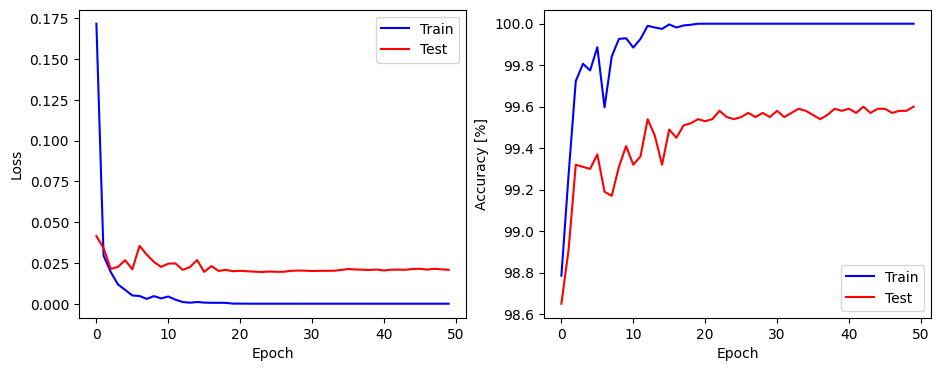

In [ ]:
# Main function to run the experiments
def main():

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Define the transformation on data
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  # Resize to 32x32
        transforms.ToTensor(),  # Convert PIL Image to tensor
        transforms.Normalize((0.5), (0.5)) # Normalize data with mean=0.5 and std=0.5
    ])
    data_loader = load_data(transform, train_val_ratio=1, batch_size=200)

    # Hyper-parameters
    num_epochs = 50
    learning_rate = 0.01
    momentum = 0.9

    # MLP architecture
    model = VGG11(input_channels=1, num_classes=10, drop_out=True).to(device)

    # Loss function
    criterion = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # Train Model
    train_losses, train_accuracies, val_losses, val_accuracies = train(
        num_epochs=num_epochs, 
        data_loader=data_loader, 
        model=model, 
        optimizer=optimizer, 
        criterion=criterion, 
        device=device, 
        verbose=True
    )

    # Plot results
    all_losses = [train_losses, val_losses]
    all_accuracies = [train_accuracies, val_accuracies]
    all_labels = ["Train", "Validation"]
    plot_all_results(all_losses, all_accuracies, all_labels)

    # Evaluating test data accuracy
    acc = calculate_accuracy(model, data_loader['test'], device)
    print(f"The CNN accuracy is: {acc: 0.5f}")

    
if __name__ == "__main__":
    main()